In [1]:
import import_ipynb
import All_in_One
import itertools
import numpy as np
from termcolor import colored
import pandas as pd

importing Jupyter notebook from All_in_One.ipynb


In [2]:
# temperature = [26,34]
# intensity = [0.52,1.08]
# inlet_temp = [23,38]
# flow_rate = [6,24]

# s = []
# s.append(temperature)
# s.append(intensity)
# s.append(inlet_temp)
# s.append(flow_rate)

# combined_list = list(itertools.product(*s))

In [2]:
temp = [*range(26,35,1)]
inte = [i/100 for i in range(52,109,1)]

inlet = [*range(23,39,1)]
fr = [*range(6,25,1)]

s = []
s.append(temp)
s.append(inte)
s.append(inlet)
s.append(fr)

combined_list = list(itertools.product(*s))
# combined_list

In [7]:
a = [1,111,2,3,4,5,2,67,45]
a.sort()
a

[1, 2, 2, 3, 4, 5, 45, 67, 111]

In [49]:
class optimality_check:
    def __init__(self,case,output):
        self.output = output
        self.case = case
        self.check()
    
    def get_model(self):
        model_name = All_in_One.All_in_one(self.case,'lr',self.output,2)
        predictions,y_val,r2_scores,model,error = model_name.train_model()
        return model
    
    def create_dataframe(self,list_):
        
        init = []
        vals = []
        for i,j in list_:
            init.append(i)
            vals.append(j[0])
        d = {"Initial parameters":init,"Optimal_Values":vals}
        df = pd.DataFrame(data=d)
        return df
    
    def check(self):
        preds = []
        values = []
        model = self.get_model()
        for i in combined_list:
            np_i = np.array(i)
            pred = model.predict(np_i.reshape(1,-1))
            preds.append(list(pred))
            values.append(list(np_i))
        max_val = max(preds)
        init_val = []
        list_ = list(zip(values,preds))
        for i,j in list_:
            if j == max_val:
                print(colored(i,"red"))
                print(colored(j,"green"))
                df = self.create_dataframe(list_)
                df=df.sort_values(['Optimal_Values'],axis=0,ascending=False)
#                 print(df)
                return df

(4, 4)
[34.0, 1.08, 23.0, 24.0]
[0.3236599497092881]


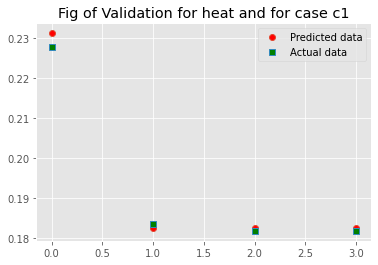

In [50]:
heat_c1 = optimality_check("c1",'heat')

(4, 4)
[34.0, 0.52, 23.0, 24.0]
[0.9846025905037928]


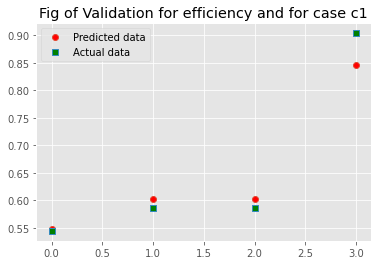

In [56]:
eff_c1 = optimality_check("c1",'efficiency')

(4, 4)
[34.0, 1.08, 23.0, 24.0]
[0.907460626399893]
              Initial parameters  Optimal_Values
155666  [34.0, 1.08, 23.0, 24.0]        0.907461
155685  [34.0, 1.08, 24.0, 24.0]        0.906242
155704  [34.0, 1.08, 25.0, 24.0]        0.905024
138338  [33.0, 1.08, 23.0, 24.0]        0.904883
155723  [34.0, 1.08, 26.0, 24.0]        0.903806
...                          ...             ...
228      [26.0, 0.52, 35.0, 6.0]        0.400475
17613    [27.0, 0.52, 38.0, 6.0]        0.399398
247      [26.0, 0.52, 36.0, 6.0]        0.399257
266      [26.0, 0.52, 37.0, 6.0]        0.398039
285      [26.0, 0.52, 38.0, 6.0]        0.396821

[155952 rows x 2 columns]


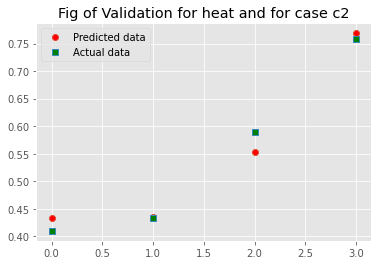

In [47]:
heat_c2 = optimality_check("c2","heat")

(4, 4)
[34.0, 0.52, 23.0, 24.0]
[0.9846025905037928]
              Initial parameters  Optimal_Values
138642  [34.0, 0.52, 23.0, 24.0]        0.984603
138946  [34.0, 0.53, 23.0, 24.0]        0.981750
138661  [34.0, 0.52, 24.0, 24.0]        0.981200
121314  [33.0, 0.52, 23.0, 24.0]        0.980476
139250  [34.0, 0.54, 23.0, 24.0]        0.978897
...                          ...             ...
16701    [26.0, 1.06, 38.0, 6.0]        0.452821
34637    [27.0, 1.08, 38.0, 6.0]        0.451242
17290    [26.0, 1.08, 37.0, 6.0]        0.450517
17005    [26.0, 1.07, 38.0, 6.0]        0.449968
17309    [26.0, 1.08, 38.0, 6.0]        0.447115

[155952 rows x 2 columns]


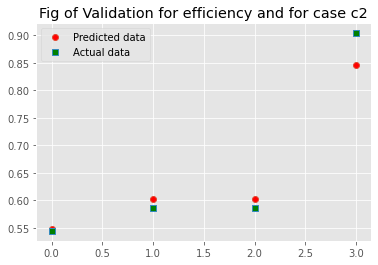

In [48]:
eff_c2 = optimality_check('c2','efficiency')